# **Redes Neurais: CIFAR-10, CIFAR-100, MNIST e Fashion MNIST**
---


Imports e definição do dataset.

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

#CIFAR-10
As classes são bastante diversas, indo de espécies de animais (gatos, veados, sapos) até veículos (carro, avião, navio)

### Setup

Carregamento do dataset cifar-10

In [ ]:
# Carregar o conjunto de dados CIFAR-10
cifar10 = keras.datasets.cifar10
#Carrega duas tuplas, representando os dados de treinamento e de teste.
#Cada tupla tem as imagens e os respectivos rótulos
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
num_classes = 10

170498071/170498071 [==============================] - 3s 0us/step


O código abaixo mostra as 10 primeiras imagens de treino e teste do cifar-10

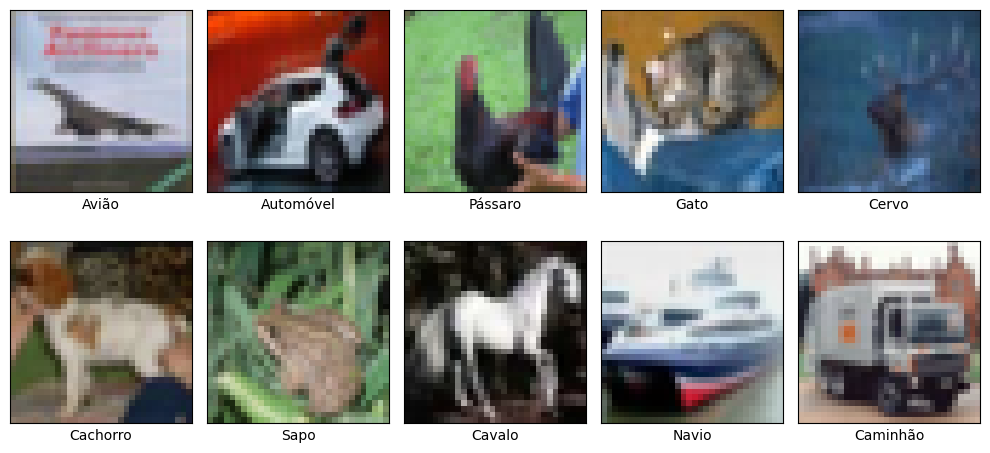

In [ ]:
# Defina as classes do CIFAR-10
class_names = ['Avião', 'Automóvel', 'Pássaro', 'Gato', 'Cervo',
               'Cachorro', 'Sapo', 'Cavalo', 'Navio', 'Caminhão']

# Crie um dicionário para mapear as classes para as imagens correspondentes
class_to_image = {}
for i in range(10):
    index = (test_labels == i).nonzero()[0][0]  # Encontre o primeiro índice da classe
    class_to_image[i] = test_images[index]

# Mostre uma imagem de cada classe
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])  # Remova os rótulos do eixo x
    plt.yticks([])  # Remova os rótulos do eixo y
    plt.imshow(class_to_image[i])
    plt.xlabel(class_names[i])

plt.tight_layout()
plt.show()

Abaixo, convertemos os rótulos escalares (números de 0 a 9) para one-hot encoding.

Não é necessário realizar este passo, caso seja utilizada a função de custo esparse_categorical_cross_entropy

In [ ]:
# Converter para codificação one-hot dos labels
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=num_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=num_classes)
#Não é necessário se utilizar como função de custo esparse_categorical_cross_entropy

### Configuração 0

Vamos começar com uma rede convolucional simples, sugerida pelo professor no kit do trabalho:
- 1x camada convolucional com 32 filtros 3x3
- Max Pooling 2x2
- Camada flatten
- MLP com 64 neuronios
- MLP com 10 neurônios - softmax (saída)

In [ ]:
# Crie o modelo de rede neural convolucional simples
def get_cifar10_network_0():
    model = keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),#(32, 32, 3) porque as imagens são 32X32 e RGB, portanto, tendo 3 canais de cor
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')  # 10 classes de saída
    ])

    # Compile o modelo
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    return model

In [ ]:
# Treine o modelo
model = get_cifar10_network_0()
history_0 = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

# Avalie o modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Acurácia no conjunto de teste: {test_accuracy *  100:.2f}%')

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_10 (Flatten)        (None, 7200)              0         
                                                                 
 dense_20 (Dense)            (None, 64)                460864    
                                                                 
 dense_21 (Dense)            (None, 10)                650       
                                                                 
Total params: 462410 (1.76 MB)
Trainable params: 462410 (1.76 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

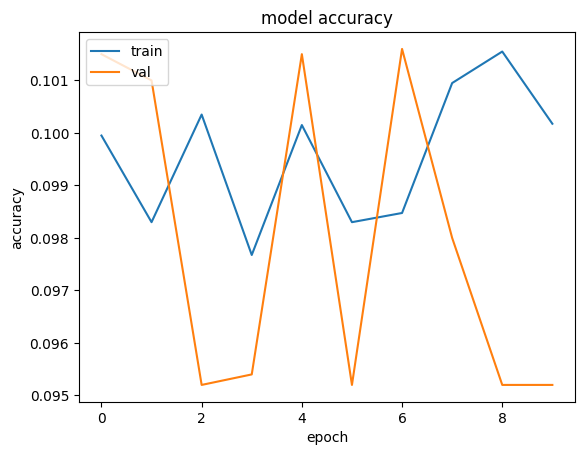

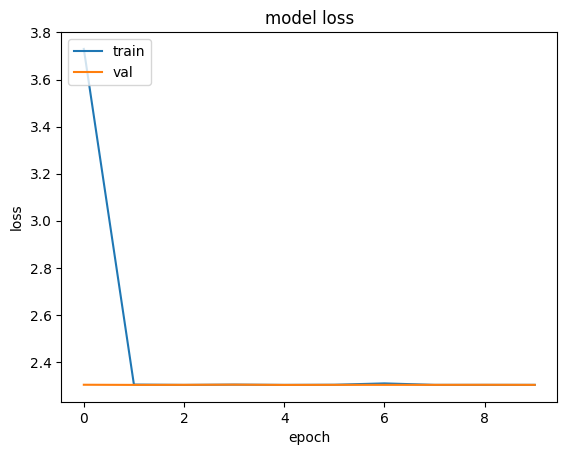

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.plot(history_0.history['accuracy'])
plt.plot(history_0.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'test'], loc='upper left')
plt.show()

plt.plot(history_0.history['loss'])
plt.plot(history_0.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'test'], loc='upper left')
plt.show()

Apenas uma camada convolucional não é suficiente para a tarefa deste dataset.

\begin{array}{|c|c|} \hline
Setup & test acc & test loss & trainingTime \\ \hline
0 & 0.3320 & 1.6574 & 84.766\\ \hline
\end{array}

### Configuração 1
Adicionamos mais camadas convolucionais, para tentar aprender mais filtros e, consequentemente, características mais complexas das imagens.
- 3x camadas convolucionais com 32 filtros 3x3
- Max Pooling 2x2
- Camada flatten
- MLP com 64 neuronios
- MLP com 10 neurônios - softmax (saída)

In [ ]:
def get_cifar10_network_1():
    model = keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')  # 10 classes de saída
    ])

    # Compile o modelo
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    return model

In [ ]:
# Treine o modelo
model = get_cifar10_network_1()
history_1 = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

# Avalie o modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Acurácia no conjunto de teste: {test_accuracy *  100:.2f}%')

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_24 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 conv2d_25 (Conv2D)          (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_11 (Flatten)        (None, 5408)              0         
                                                                 
 dense_22 (Dense)            (None, 64)                346176    
                                                     

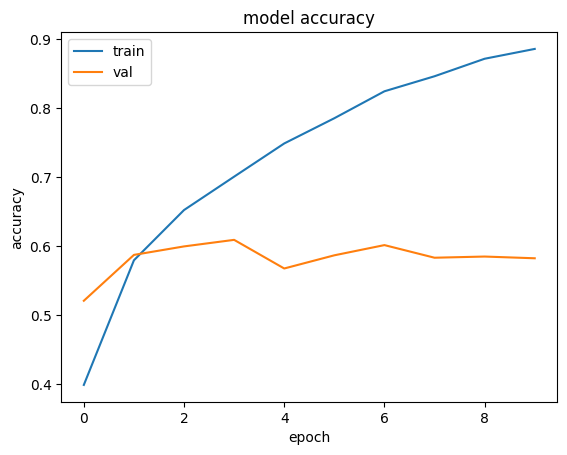

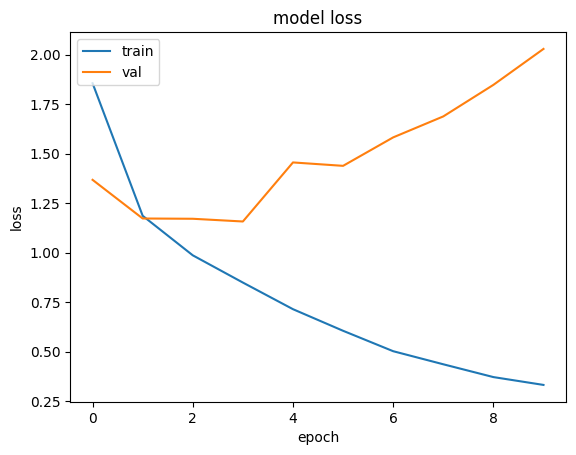

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'test'], loc='upper left')
plt.show()

plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'test'], loc='upper left')
plt.show()

A acurácia do conjunto de teste apresentou ganhos. Porém, o erro no conjunto de teste e validação ficaram altos e tendiam a aumentar, o que não é desejável. Ainda estamos em underfit.

\begin{array}{|c|c|} \hline
Setup & test acc & test loss & trainingTime \\ \hline
0 & 0.3320 & 1.6574 & 84.766\\ \hline
1 & 0.5866 & 1.9993 & 85.073 \\\hline
\end{array}

### Configuração 2
Mesmo com mais camadas convolucionais, ainda não tivemos ganho suficiente. Triplicamos as camadas, com o mesmo número de filtros, mas aumentando o tamanho ao longo das camadas, para tentar aprender características mais gerais e abstratas.

- 1x camada convolucional com 32 filtros 3x3
- 1x camada convolucional com 32 filtros 7x7
- 1x camada convolucional com 32 filtros 11x11
- Max Pooling 2x2
- Camada flatten
- MLP com 64 neuronios
- MLP com 10 neurônios - softmax (saída)

In [ ]:
# Adiciona mais camadas convolucionais, para aprender mais características pelos filtros
def get_cifar10_network_2():
    model = keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        tf.keras.layers.Conv2D(32, (7, 7), activation='relu'),
        tf.keras.layers.Conv2D(32, (11, 11), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')  # 10 classes de saída
    ])

    # Compile o modelo
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    return model

In [ ]:
# Treine o modelo
model = get_cifar10_network_2()
history_2 = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

# Avalie o modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Acurácia no conjunto de teste: {test_accuracy *  100:.2f}%')

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_27 (Conv2D)          (None, 24, 24, 32)        50208     
                                                                 
 conv2d_28 (Conv2D)          (None, 14, 14, 32)        123936    
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 7, 7, 32)          0         
 ng2D)                                                           
                                                                 
 flatten_12 (Flatten)        (None, 1568)              0         
                                                                 
 dense_24 (Dense)            (None, 64)                100416    
                                                     

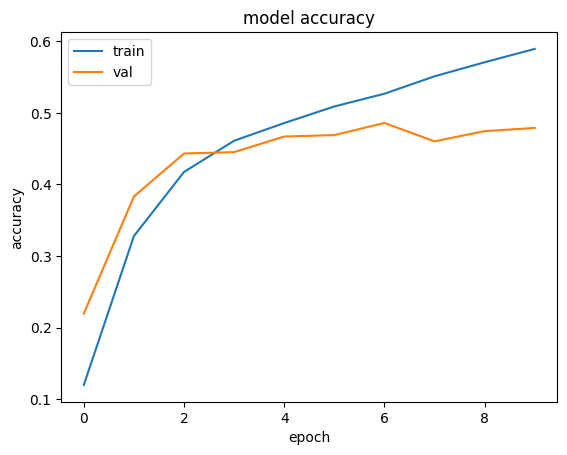

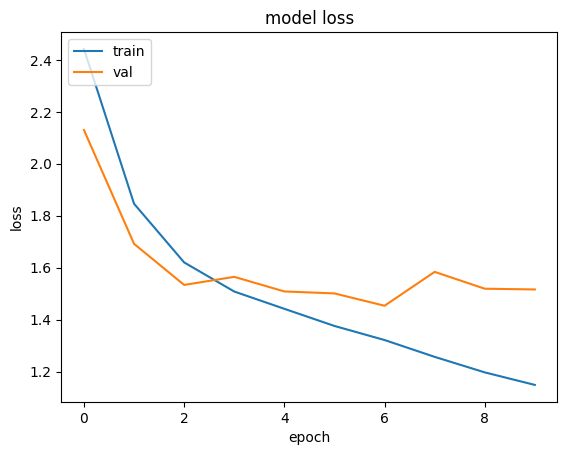

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'test'], loc='upper left')
plt.show()

plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'test'], loc='upper left')
plt.show()

Apesar de retomarmos o padrão de descida do erro no dataset de validação, ele estabiliza a partir da epoch 3, não indicando que acompanharia o erro do dataset de treino. O mesmo se observa na acurácia, a partir da mesma epoch.

\begin{array}{|c|c|} \hline
Setup & test acc & test loss & trainingTime \\ \hline
0 & 0.3320 & 1.6574 & 84.766\\ \hline
1 & 0.5866 & 1.9993 & 85.073 \\\hline
2 & 0.5155 & 1.4969 & 84.731 \\ \hline
\end{array}

### Configuração 3
Tivemos alguns sinais trabalhando o tamanho de filtros profundos. Podemos também progredir com o número de filtros de forma profunda, para aumentar sua capacidade de identificar características diferentes em cada camada.
- 1x camada convolucional com 32 filtros 3x3
- 1x camada convolucional com 64 filtros 7x7
- 1x camada convolucional com 128 filtros 11x11
- Max Pooling 2x2
- Camada flatten
- MLP com 64 neuronios
- MLP com 10 neurônios - softmax (saída)

In [ ]:
# Adiciona mais camadas convolucionais, para aprender mais características pelos filtros
def get_cifar10_network_3():
    model = keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        tf.keras.layers.Conv2D(64, (7, 7), activation='relu', input_shape=(32, 32, 3)),
        tf.keras.layers.Conv2D(128, (11, 11), activation='relu', input_shape=(32, 32, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')  # 10 classes de saída
    ])

    # Compile o modelo
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    return model

In [ ]:
# Treine o modelo
model = get_cifar10_network_3()
history_3 = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

# Avalie o modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Acurácia no conjunto de teste: {test_accuracy *  100:.2f}%')

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_30 (Conv2D)          (None, 24, 24, 64)        100416    
                                                                 
 conv2d_31 (Conv2D)          (None, 14, 14, 128)       991360    
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 7, 7, 128)         0         
 ng2D)                                                           
                                                                 
 flatten_13 (Flatten)        (None, 6272)              0         
                                                                 
 dense_26 (Dense)            (None, 64)                401472    
                                                     

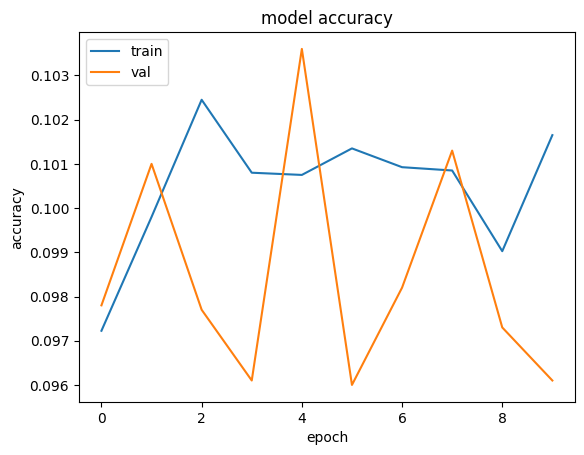

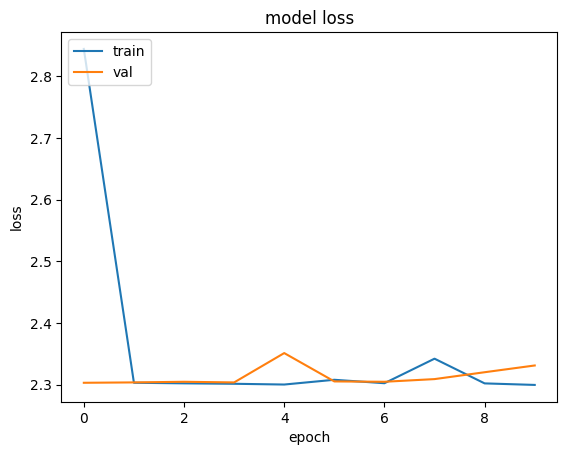

In [ ]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'test'], loc='upper left')
plt.show()

plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'test'], loc='upper left')
plt.show()

Diminuimos a acurácia e aumentamos um pouco o erro, além de que podemos observar um padrão estranho nos plots. Talvez a rede ainda esteja relativamente simples para a complexidade oferecida pelo dataset. Curiosamente, este foi o treinamento mais demorado dos 5 setups.

\begin{array}{|c|c|} \hline
Setup & test acc & test loss & trainingTime \\ \hline
0 & 0.3320 & 1.6574 & 84.766\\ \hline
1 & 0.5866 & 1.9993 & 85.073 \\\hline
2 & 0.5155 & 1.4969 & 84.731 \\ \hline
3 & 0.4437 & 1.5709 & 144.646 \\ \hline
\end{array}

### Configuração 4
A estratégia foi adicionar mais camadas convolucionais, para tentar aumentar a complexidade do modelo. Além disto, nos inspiramos em arquiteturas clássicas, como VGG, AlexNet, etc, trazendo padrões como a combinação Conv-Pool-Conv-Pool ou Conv-Conv-Pool. Outros padrões muito utilizados são a sequência de tamanho de filtros 32-64-128 ou 32-32-64-64.

Para esta configuração, trouxe alguns aspectos da VGG-16, com um padrão reduzido de 2 conv + pool e 3 conv + pool, pelo tamanho reduzido das imagens do dataset.

- 2x camadas convolucionais com 32 filtros 3x3
- Max Pooling 2x2, stride 2x2
- 3x camadas convolucionais com 64 filtros 3x3
- Max Pooling 2x2, stride 2x2
- Camada flatten
- MLP com 120 neuronios
- MLP com 84 neuronios
- MLP com 10 neurônios - softmax (saída)

In [ ]:
def get_cifar10_network_4():
    model = keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(120, activation='relu'),
        tf.keras.layers.Dense(84, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')  # 10 classes de saída
    ])

    # Compile o modelo
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    return model

In [ ]:
# Treine o modelo
model = get_cifar10_network_4()
history_4 = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

# Avalie o modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Acurácia no conjunto de teste: {test_accuracy *  100:.2f}%')

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_33 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_34 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 conv2d_35 (Conv2D)          (None, 10, 10, 64)        36928     
                                                                 
 conv2d_36 (Conv2D)          (None, 8, 8, 64)          36928     
                                                     

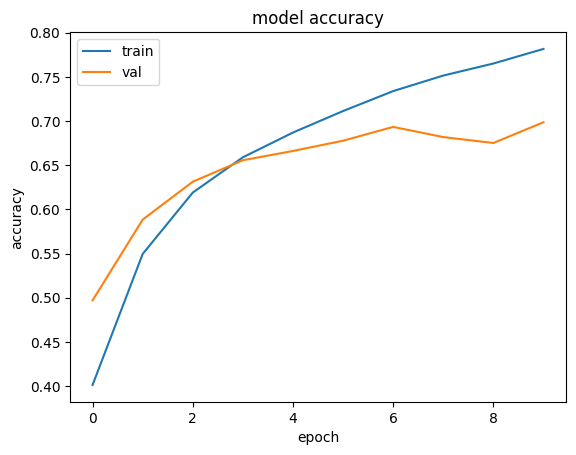

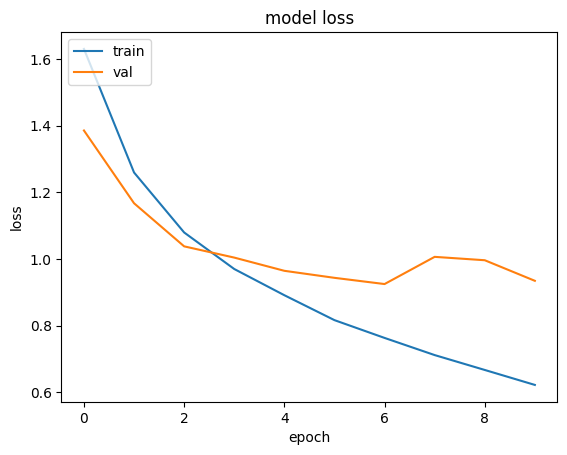

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'test'], loc='upper left')
plt.show()

plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'test'], loc='upper left')
plt.show()

Esta foi a configuração mais promissora até o momento. Poderíamos criar mais camadas ainda, mas um dos problemas é que a imagem acaba se reduzindo ao longo dos strides, perdendo algumas características das bordas ao longo das camadas convolucionais.

\begin{array}{|c|c|} \hline
Setup & test acc & test loss & trainingTime \\ \hline
0 & 0.3320 & 1.6574 & 84.766\\ \hline
1 & 0.5866 & 1.9993 & 85.073 \\\hline
2 & 0.5155 & 1.4969 & 84.731 \\ \hline
3 & 0.4437 & 1.5709 & 144.646 \\ \hline
4 & 0.6885 & 0.9940 & 76.213 \\ \hline
\end{array}

### Configuração 5
Podemos experimentar usar padding em algumas camadas, para considerar características mais próximas das bordas das imagens. Além disto, ajuda a preservar as dimensões de entrada da imagem, permitindo uma arquitetura mais profunda e tendendo a uma melhor performance.

- 2x camadas convolucionais com 32 filtros 3x3
- Max Pooling 2x2, stride 2x2
- 3x camadas convolucionais com 64 filtros 3x3
- Max Pooling 2x2, stride 2x2
- 3x camadas convolucionais com 128 filtros 3x3
- Max Pooling 2x2, stride 2x2
- Camada flatten
- MLP com 120 neuronios
- MLP com 84 neuronios
- MLP com 10 neurônios - softmax (saída)

In [ ]:
def get_cifar10_network_5():
    model = keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2), padding='same'),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2), padding='same'),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2), ),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(120, activation='relu'),
        tf.keras.layers.Dense(84, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')  # 10 classes de saída
    ])

    # Compile o modelo
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    return model

In [ ]:
# Treine o modelo
model = get_cifar10_network_5()
history_5 = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

# Avalie o modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Acurácia no conjunto de teste: {test_accuracy *  100:.2f}%')

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_38 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_39 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_40 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 conv2d_41 (Conv2D)          (None, 16, 16, 64)        36928     
                                                     

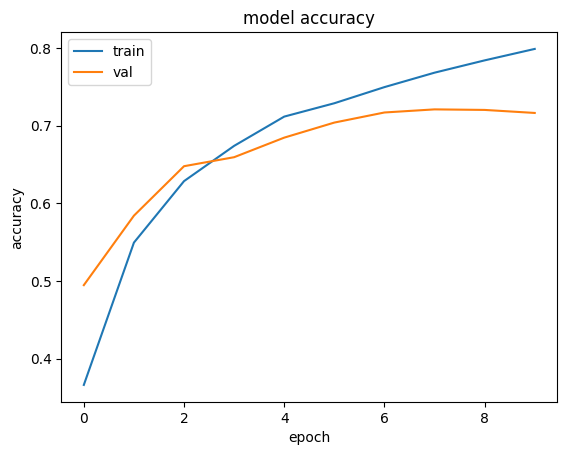

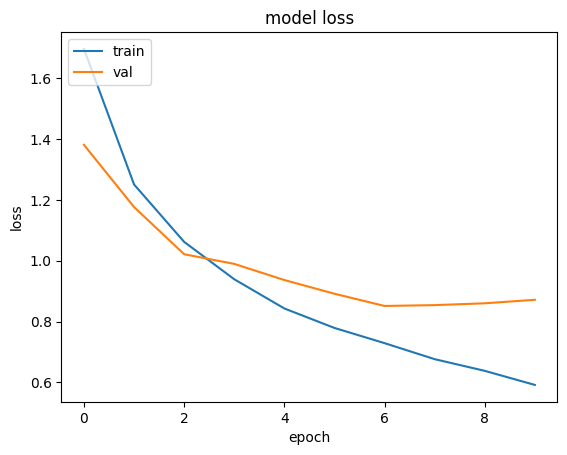

In [ ]:
plt.plot(history_5.history['accuracy'])
plt.plot(history_5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'test'], loc='upper left')
plt.show()

plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'test'], loc='upper left')
plt.show()

Observamos uma melhora sutil com o uso de padding nos dois primeiros conjuntos de camadas. O último conjunto foi feito sem padding, para dar ênfase nas informações no centro da imagem, que geralmente são objetos ou animais.

\begin{array}{|c|c|} \hline
Setup & test acc & test loss & trainingTime \\ \hline
0 & 0.3320 & 1.6574 & 84.766\\ \hline
1 & 0.5866 & 1.9993 & 85.073 \\\hline
2 & 0.5155 & 1.4969 & 84.731 \\ \hline
3 & 0.4437 & 1.5709 & 144.646 \\ \hline
4 & 0.6885 & 0.9940 & 76.213 \\ \hline
5 & 0.7187 & 0.8870 & 145.902 \\ \hline
\end{array}

### Resultados CIFAR-10

\begin{array}{|c|c|} \hline
Setup & test acc & test loss & trainingTime \\ \hline
0 & 0.3320 & 1.6574 & 84.766\\ \hline
1 & 0.5866 & 1.9993 & 85.073 \\\hline
2 & 0.5155 & 1.4969 & 84.731 \\ \hline
3 & 0.4437 & 1.5709 & 144.646 \\ \hline
4 & 0.6885 & 0.9940 & 76.213 \\ \hline
5 & 0.7187 & 0.8870 & 145.902 \\ \hline
\end{array}

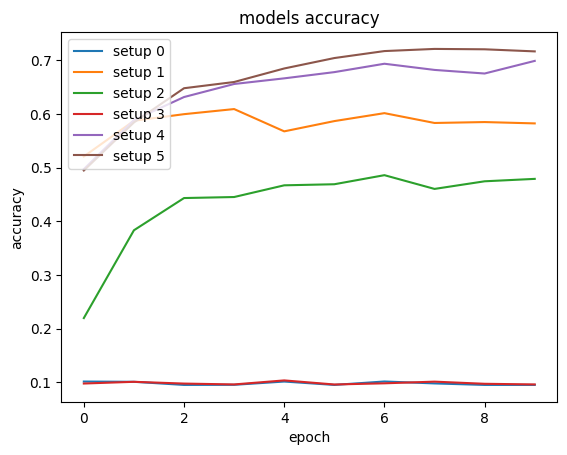

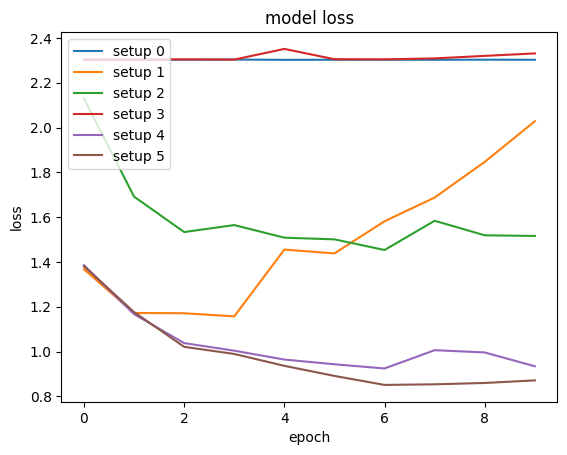

In [ ]:
plt.plot(history_0.history['val_accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.plot(history_5.history['val_accuracy'])
plt.title('models accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['setup 0', 'setup 1', 'setup 2', 'setup 3', 'setup 4', 'setup 5'], loc='upper left')
plt.show()

plt.plot(history_0.history['val_loss'])
plt.plot(history_1.history['val_loss'])
plt.plot(history_2.history['val_loss'])
plt.plot(history_3.history['val_loss'])
plt.plot(history_4.history['val_loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['setup 0', 'setup 1', 'setup 2', 'setup 3', 'setup 4', 'setup 5'], loc='upper left')
plt.show()

In [ ]:
results = {
    "cifar10": {"time": 145.902, "acc": 0.7187},
}

# CIFAR-100

O CIFAR-100 é uma extensão do CIFAR-10, pois também contém 60000 imagens, mas divididas entre 100 classes (600 imagens cada). Também conta com imagens RGB, de tamanho 32x32 pixels.

O dataset já disponibiliza um conjunto de treino com 50.000 imagens e um conjunto de teste com 10.000 imagens.

As 100 classes são divididas em 20 super-classes bastante diversas, como fauna (aquáticos, peixes, insetos, répteis, mamíferos), flora (flores, árvores), e elementos humanos (pessoas, veículos, objetos manufaturados, etc).

A alta similaridade entre as classes dentro das superclasses faz deste um problema difícil de ser treinado (https://arxiv.org/pdf/2210.16914v1.pdf).

https://www.cs.toronto.edu/~kriz/cifar.html



### Setup

In [ ]:
# Carregar o conjunto de dados CIFAR-100
cifar100 = keras.datasets.cifar100

#Carrega duas tuplas, representando os dados de treinamento e de teste.
#Cada tupla tem as imagens e os respectivos rótulos
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()
num_classes = 100

169001437/169001437 [==============================] - 11s 0us/step


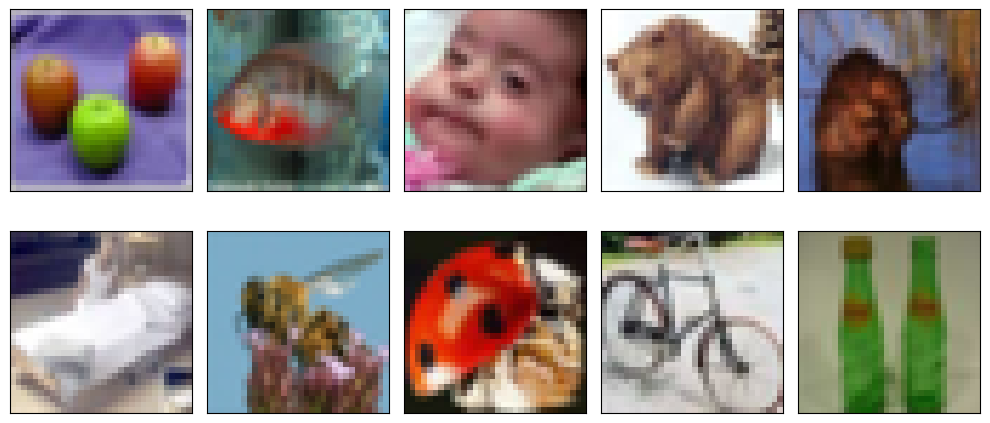

In [ ]:
# Crie um dicionário para mapear as classes para as imagens correspondentes
class_to_image = {}
for i in range(20):
    index = (test_labels == i).nonzero()[0][0]  # Encontre o primeiro índice da classe
    class_to_image[i] = test_images[index]

# Mostre uma imagem de cada classe
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])  # Remova os rótulos do eixo x
    plt.yticks([])  # Remova os rótulos do eixo y
    plt.imshow(class_to_image[i])

plt.tight_layout()
plt.show()

In [ ]:
# Converter para codificação one-hot dos labels
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=num_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=num_classes)
#Não é necessário se utilizar como função de custo esparse_categorical_cross_entropy

### Configuração 1
Para iniciar, a primeira intuição foi testar a arquitetura criada para o CIFAR-10 no dataset CIFAR-100. A única modificação foi na MLP de saída, com mais neurônios por camada e uma camada final com 100 neurônios para as 100 classes.

- 2x camadas convolucionais com 32 filtros 3x3
- Max Pooling 2x2, stride 2x2
- 3x camadas convolucionais com 64 filtros 3x3
- Max Pooling 2x2, stride 2x2
- 3x camadas convolucionais com 128 filtros 3x3
- Max Pooling 2x2, stride 2x2
- Camada flatten
- MLP com 256 neuronios
- MLP com 128 neuronios
- MLP com 100 neurônios - softmax (saída)

In [ ]:
def get_cifar100_network_1():
    model = keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2), padding='same'),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2), padding='same'),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2), ),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')  # 100 classes de saída
    ])

    # Compile o modelo
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    return model


In [ ]:
# Treine o modelo
model = get_cifar100_network_1()
cf100_1 = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

# Avalie o modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Acurácia no conjunto de teste: {test_accuracy * 100:.2f}%')

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_69 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_70 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_71 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_72 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 conv2d_73 (Conv2D)          (None, 16, 16, 64)        36928     
                                                     

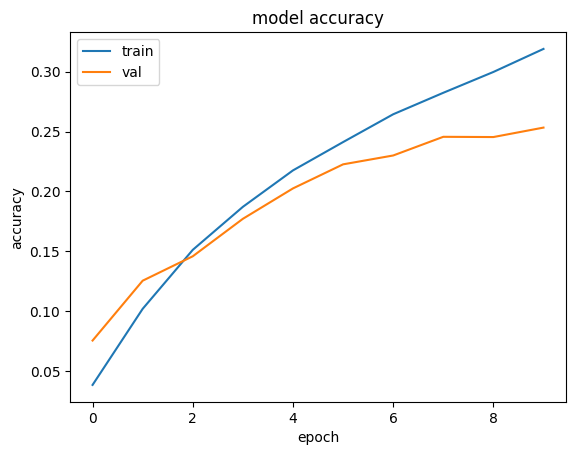

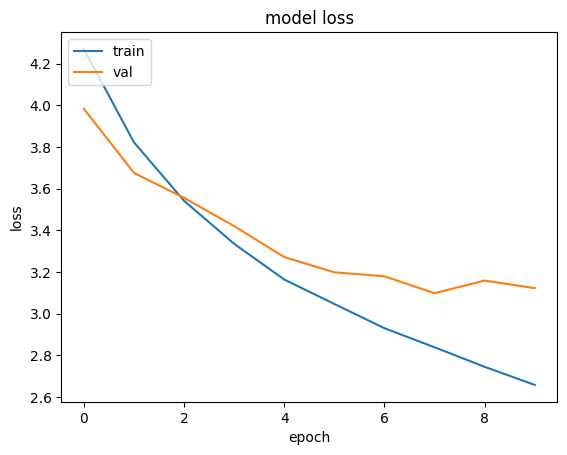

In [ ]:
plt.plot(cf100_1.history['accuracy'])
plt.plot(cf100_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'test'], loc='upper left')
plt.show()

plt.plot(cf100_1.history['loss'])
plt.plot(cf100_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'test'], loc='upper left')
plt.show()

Inicialmente, me pareceu uma  tendência de descida das curvas de erro, e subida das curvas de acurácia, tanto em treino quanto em validação. Porém, testando com algumas epochs a mais, foi possível observar uma estabilização, tendendo a um plateau por volta de 23% e 25% de acurácia.

Sendo um dataset com diferenças entre classes cada vez mais sutis e que contém 10 vezes mais classes, o modelo precisa encontrar mais filtros e extrair mais features dos dados. Porém, se torna difícil realizar esta tarefa com apenas 600 imagens por classe, ao contrário das 6.000 do CIFAR-10.

- CIFAR-10
\begin{array}{|c|c|} \hline
Setup & test acc & test loss & trainingTime \\ \hline
5 & 0.7187 & 0.8870 & 145.902 \\ \hline
\end{array}

- CIFAR-100
\begin{array}{|c|c|} \hline
Setup & test acc & test loss & trainingTime \\ \hline
1 & 0.2593 & 3.0888 & 146.951 \\ \hline
\end{array}

### Configuração 2
Tentar com um outro padrão de arquitetura.

- 1x camada convolucional com 32 filtros 3x3
- Max Pooling 2x2, stride 2x2
- 1x camada convolucional com 128 filtros 3x3
- Max Pooling 2x2, stride 2x2
- 1x camada convolucional com 128 filtros 3x3
- Max Pooling 2x2, stride 2x2
- Camada flatten
- MLP com 512 neuronios
- MLP com 100 neurônios - softmax (saída)

In [ ]:
def get_cifar100_network_2():
    model = keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')  # 100 classes de saída
    ])

    # Compile o modelo
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    return model


In [ ]:
# Treine o modelo
model = get_cifar100_network_2()
cf100_2 = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

  # Avalie o modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Acurácia no conjunto de teste: {test_accuracy * 100:.2f}%')

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_77 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_78 (Conv2D)          (None, 13, 13, 128)       36992     
                                                                 
 max_pooling2d_37 (MaxPooli  (None, 6, 6, 128)         0         
 ng2D)                                                           
                                                                 
 conv2d_79 (Conv2D)          (None, 4, 4, 128)         147584    
                                                                 
 max_pooling2d_38 (MaxPooli  (None, 2, 2, 128)       

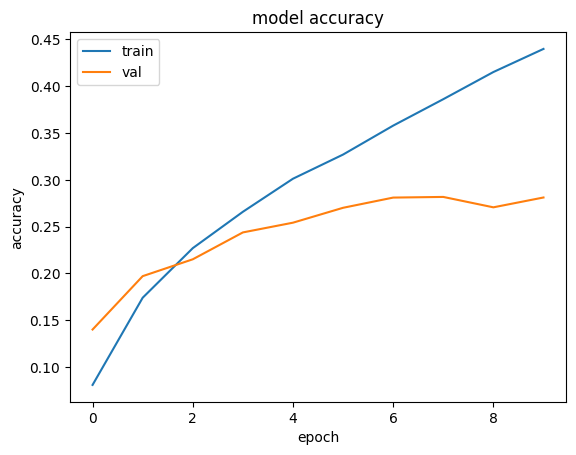

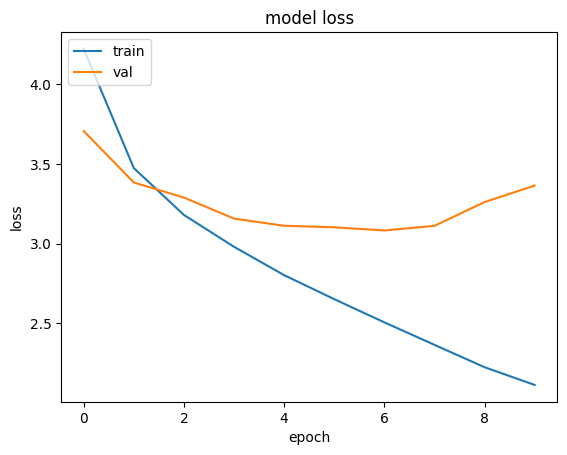

In [ ]:
plt.plot(cf100_2.history['accuracy'])
plt.plot(cf100_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'test'], loc='upper left')
plt.show()

plt.plot(cf100_2.history['loss'])
plt.plot(cf100_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'test'], loc='upper left')
plt.show()

Obtivemos um modelo pior, ainda em underfitting.

\begin{array}{|c|c|} \hline
Setup & test acc & test loss & trainingTime \\ \hline
1 & 0.2593 & 3.0888 & 146.951 \\ \hline
2 & 0.2785 & 3.3499 & 85.152 \\ \hline
\end{array}

### Configuração 3
Ajusta o hiperparâmetro de learning rate do otimizador Adam para 1e-4. Modifica as camadas, adicionando padding, trocando stride para 1x1.

- 1x camada convolucional com 32 filtros 3x3
- 1x camada convolucional com 64 filtros 3x3
- Max Pooling 2x2, stride 1x1
- 2x camada convolucionais com 128 filtros 3x3
- Max Pooling 2x2, stride 1x1
- 1x camada convolucional com 128 filtros 3x3
- Max Pooling 2x2, stride 1x1
- Camada flatten
- MLP com 512 neuronios
- MLP com 100 neurônios - softmax (saída)

In [ ]:
def get_cifar100_network_3():
    model = keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='valid'),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='valid'),
        tf.keras.layers.MaxPooling2D((2, 2), padding='valid'),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')  # 100 classes de saída
    ])

    opt = keras.optimizers.Adam(learning_rate=0.0001)

    # Compile o modelo
    model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    return model


In [ ]:
# Treine o modelo
model = get_cifar100_network_3()
cf100_3 = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

  # Avalie o modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Acurácia no conjunto de teste: {test_accuracy * 100:.2f}%')

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_95 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_96 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_48 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_97 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 conv2d_98 (Conv2D)          (None, 10, 10, 128)       147584    
                                                                 
 max_pooling2d_49 (MaxPooli  (None, 5, 5, 128)         0         
 ng2D)                                               

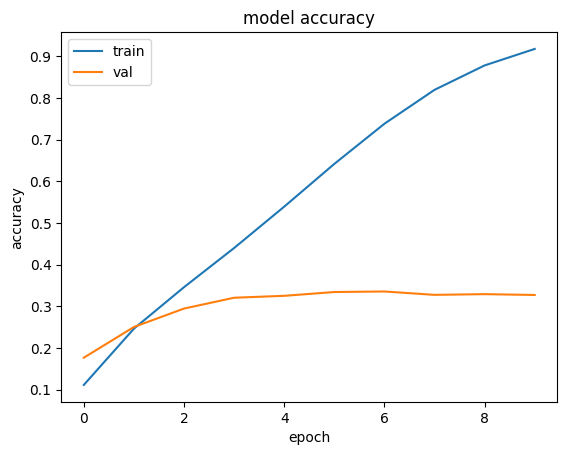

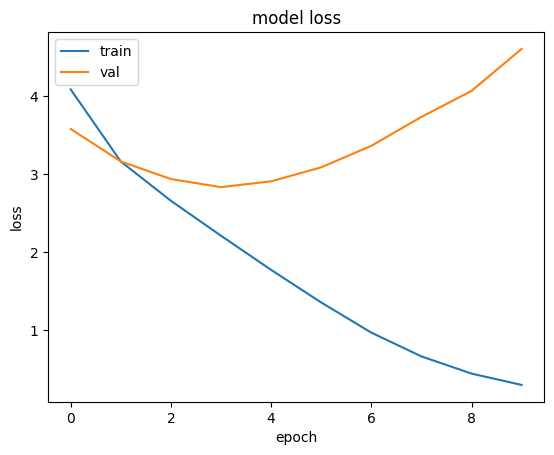

In [ ]:
plt.plot(cf100_3.history['accuracy'])
plt.plot(cf100_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'test'], loc='upper left')
plt.show()

plt.plot(cf100_3.history['loss'])
plt.plot(cf100_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'test'], loc='upper left')
plt.show()

O ajuste do learning rate trouxe um pequeno ganho, mas o modelo apresenta overfitting, com o erro crescendo.

\begin{array}{|c|c|} \hline
Setup & test acc & test loss & trainingTime \\ \hline
1 & 0.2593 & 3.0888 & 146.951 \\ \hline
2 & 0.2785 & 3.3499 & 85.152 \\ \hline
3 & 0.3329 & 4.5566 & 85.638 \\ \hline
\end{array}

### Resultados CIFAR-100

\begin{array}{|c|c|} \hline
Setup & test acc & test loss & trainingTime \\ \hline
1 & 0.2593 & 3.0888 & 146.951 \\ \hline
2 & 0.2785 & 3.3499 & 85.152 \\ \hline
3 & 0.3329 & 4.5566 & 85.638 \\ \hline
\end{array}

Este dataset é particularmente difícil de treinar sem técnicas um pouco mais sofisticadas. O CIFAR-100 contém apenas 600 amostras de cada classe, diferente das 6.000 do CIFAR-10. Além disto, as classes dentro de cada superclasse apresentam uma alta similaridade, o que torna a tarefa de classificação mais difícil.

Com isto, nossa hipótese é que os dados de treinamento são insuficientes para um treinamento satisfatório. Uma das possibilidades imediatas seria utilizar data augmentation para criar mais amostras das imagens por classe e facilitar a tarefa de treinamento. Além disto, existem outras técnicas, como batch normalization, que ainda poderiam ser exploradas para melhoria da acurácia. Outra possibilidade é o uso de transfer learning.

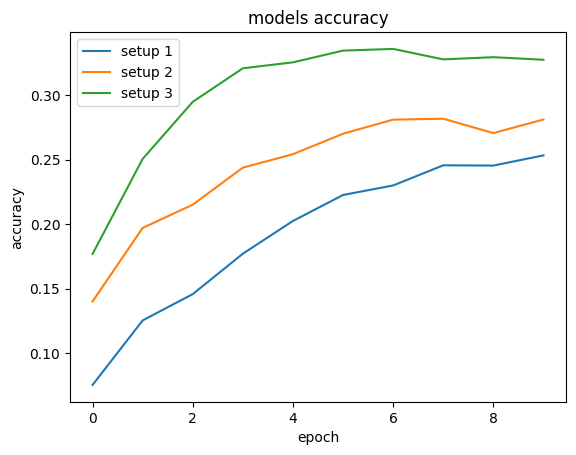

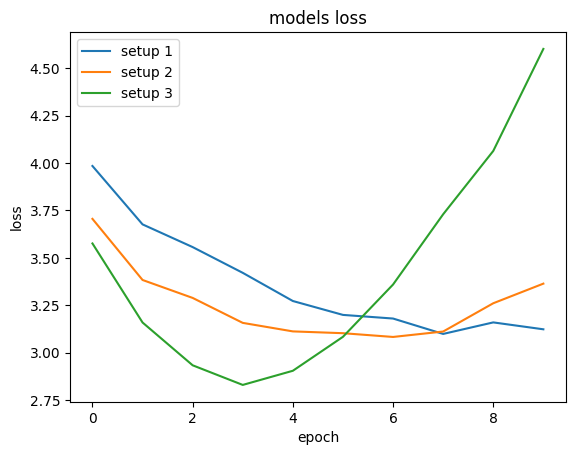

In [ ]:
plt.plot(cf100_1.history['val_accuracy'])
plt.plot(cf100_2.history['val_accuracy'])
plt.plot(cf100_3.history['val_accuracy'])
plt.title('models accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['setup 1', 'setup 2', 'setup 3'], loc='upper left')
plt.show()

plt.plot(cf100_1.history['val_loss'])
plt.plot(cf100_2.history['val_loss'])
plt.plot(cf100_3.history['val_loss'])
plt.title('models loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['setup 1', 'setup 2', 'setup 3'], loc='upper left')
plt.show()

In [ ]:
results = {
    "cifar100": {"time": 85.638, "acc": 0.3329},
}

# MNIST

In [ ]:
# Carregar o conjunto de dados MNIST
mnist = keras.datasets.mnist

#Carrega duas tuplas, representando os dados de treinamento e de teste.
#Cada tupla tem as imagens e os respectivos rótulos
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
num_classes = 10

11490434/11490434 [==============================] - 0s 0us/step


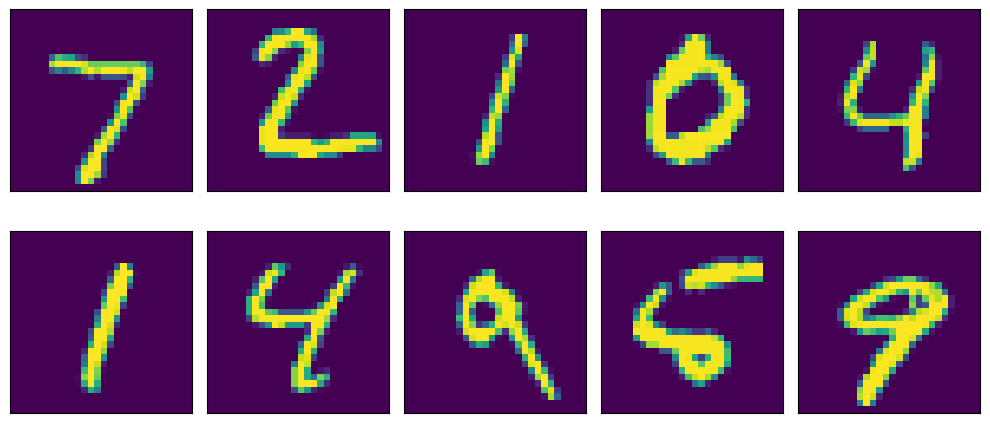

In [ ]:
# Mostre uma imagem de cada classe
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])  # Remova os rótulos do eixo x
    plt.yticks([])  # Remova os rótulos do eixo y
    plt.imshow(test_images[i])

plt.tight_layout()
plt.show()

In [ ]:
# Converter para codificação one-hot dos labels
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=num_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=num_classes)
#Não é necessário se utilizar como função de custo esparse_categorical_cross_entropy

### Configuração 1
Usando uma rede neural simples.
- Flatten 28x28
- Camada densamente conectada, 128 neurônios, ativação ReLU
- Camada densamente conectada, 10 neurônios, ativação softmax (saída)

In [ ]:
def get_mnist_network_1():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])

    # Compile o modelo
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    return model


In [ ]:
# Treine o modelo
model = get_mnist_network_1()
mnist_1 = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

# Avalie o modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Acurácia no conjunto de teste: {test_accuracy * 100:.2f}%')

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 3.0010 - accuracy: 0.8523 - val_loss: 0.5715 - val_accuracy: 0.8803
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4243 - accuracy: 0.9032 - val_loss: 0.3435 - val_accurac

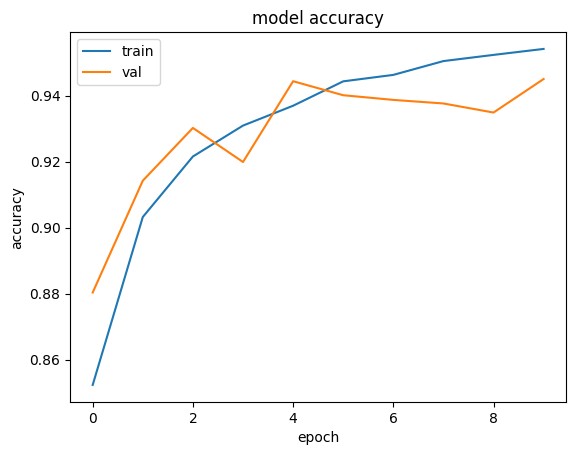

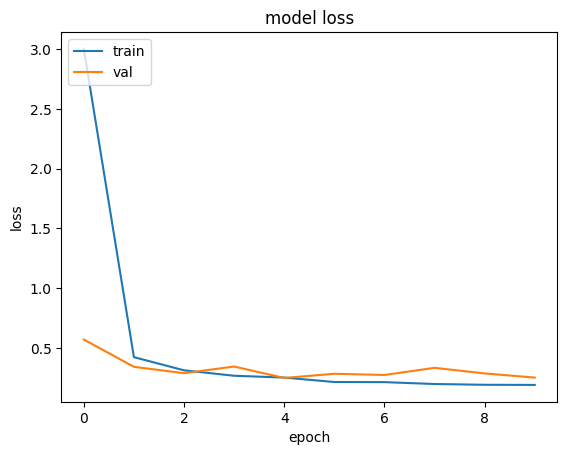

In [ ]:
plt.plot(mnist_1.history['accuracy'])
plt.plot(mnist_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'test'], loc='upper left')
plt.show()

plt.plot(mnist_1.history['loss'])
plt.plot(mnist_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'test'], loc='upper left')
plt.show()

Com uma simples rede neural MLP, já atingimos uma acurácia de quase 95%, com um tempo de treinamento de menos de um minuto. Isto reforça a importância da exploração dos dados para definir as arquiteturas, pois muitas vezes menos é mais.

\begin{array}{|c|c|} \hline
Setup & test acc & test loss & trainingTime \\ \hline
1 & 0.9478 & 0.2561 & 50.002 \\ \hline
\end{array}

### Configuração 2
Usando uma rede neural convolucional simples.
- Camada convolucional com 32 filtros 3x3, ativação ReLU
- Max Pooling 2x2, stride 1x1
- Camada flatten
- MLP densamente conectada com 50 neurônios, ativação ReLU
- MLP densamente conectada com 10 neurônios, ativação softmax (saída)

In [ ]:
def get_mnist_network_2():
    model = keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    # Compile o modelo
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    return model

In [ ]:
# Treine o modelo
model = get_mnist_network_2()
mnist_2 = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

# Avalie o modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Acurácia no conjunto de teste: {test_accuracy * 100:.2f}%')

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 5408)              0         
                                                                 
 dense_12 (Dense)            (None, 50)                270450    
                                                                 
 dense_13 (Dense)            (None, 10)                510       
                                                                 
Total params: 271280 (1.03 MB)
Trainable params: 271280 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

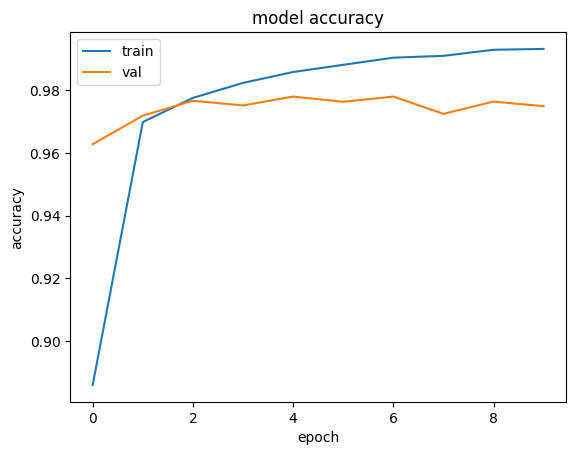

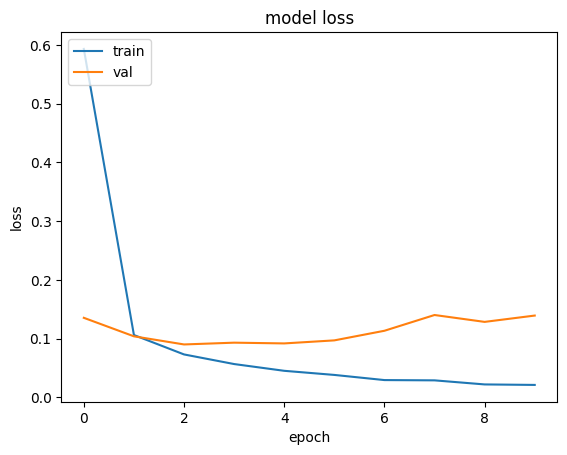

In [ ]:
plt.plot(mnist_2.history['accuracy'])
plt.plot(mnist_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'test'], loc='upper left')
plt.show()

plt.plot(mnist_2.history['loss'])
plt.plot(mnist_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'test'], loc='upper left')
plt.show()

Uma rede neural convolucional simples conseguiu melhorar em todos os aspectos.

\begin{array}{|c|c|} \hline
Setup & test acc & test loss & trainingTime \\ \hline
1 & 0.9478 & 0.2561 & 50.002 \\ \hline
2 & 0.9778 & 0.1297 & 61.650 \\ \hline
\end{array}

### Configuração 3
Aumentando a profundidade da rede neural convolucional.
- Camada convolucional com 32 filtros 3x3, ativação ReLU
- Max Pooling 2x2, stride 1x1
- Camada convolucional com 64 filtros 3x3, ativação ReLU
- Max Pooling 2x2, stride 1x1
- Camada flatten
- MLP densamente conectada com 50 neurônios, ativação ReLU
- MLP densamente conectada com 10 neurônios, ativação softmax (saída)

In [ ]:
def get_mnist_network_3():
    model = keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    # Compile o modelo
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    return model

In [ ]:
# Treine o modelo
model = get_mnist_network_3()
mnist_3 = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

# Avalie o modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Acurácia no conjunto de teste: {test_accuracy * 100:.2f}%')

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_7 (Flatten)         (None, 1600)              0         
                                                                 
 dense_14 (Dense)            (None, 50)               

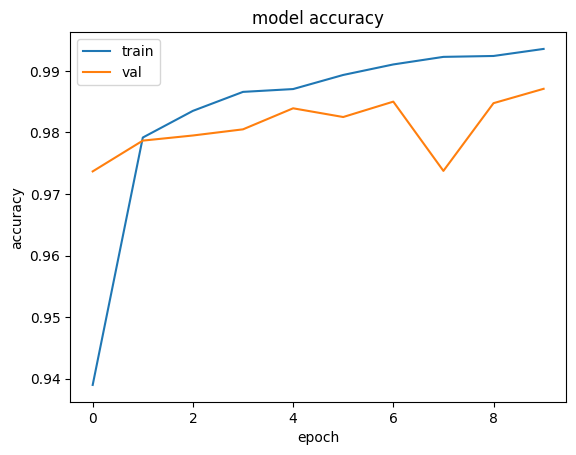

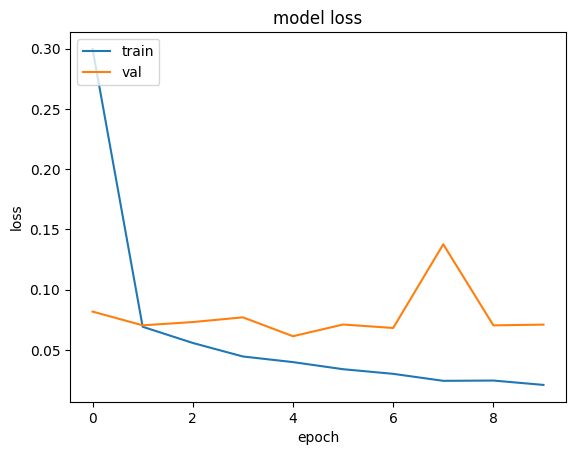

In [ ]:
plt.plot(mnist_3.history['accuracy'])
plt.plot(mnist_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'test'], loc='upper left')
plt.show()

plt.plot(mnist_3.history['loss'])
plt.plot(mnist_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'test'], loc='upper left')
plt.show()

Conseguimos uma pequena melhoria na acurácia, mas uma diminuição interessante no erro. Todavia, observando o perfil do teste-validação, talvez esteja se aproximando de um overfitting.

\begin{array}{|c|c|} \hline
Setup & test acc & test loss & trainingTime \\ \hline
1 & 0.9478 & 0.2561 & 50.002 \\ \hline
2 & 0.9778 & 0.1297 & 61.650 \\ \hline
3 & 0.9862 & 0.0705 & 83.641 \\ \hline
\end{array}

### Configuração 4
Aumentando um pouco mais a profundidade da rede, tentando se aproximar de um overfitting.
- Camada convolucional com 32 filtros 3x3, ativação ReLU
- Max Pooling 2x2, stride 1x1
- Camada convolucional com 64 filtros 3x3, ativação ReLU
- Max Pooling 2x2, stride 1x1
- Camada convolucional com 128 filtros 3x3, ativação ReLU
- Max Pooling 2x2, stride 1x1
- Camada flatten
- MLP densamente conectada com 50 neurônios, ativação ReLU
- MLP densamente conectada com 10 neurônios, ativação softmax (saída)

In [ ]:
def get_mnist_network_4():
    model = keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    # Compile o modelo
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    return model

In [ ]:
# Treine o modelo
model = get_mnist_network_4()
mnist_4 = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

# Avalie o modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Acurácia no conjunto de teste: {test_accuracy * 100:.2f}%')

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 1, 1, 128)        

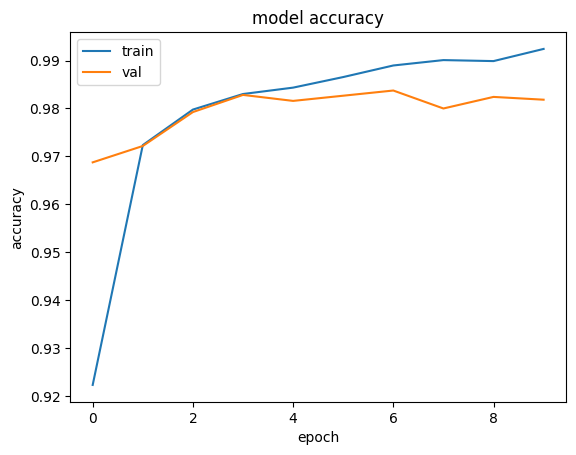

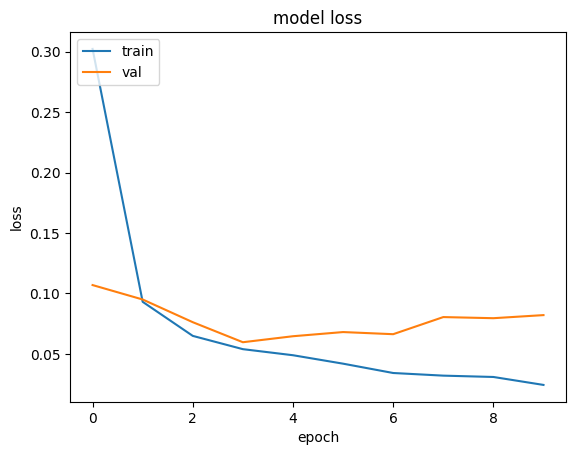

In [ ]:
plt.plot(mnist_4.history['accuracy'])
plt.plot(mnist_4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'test'], loc='upper left')
plt.show()

plt.plot(mnist_4.history['loss'])
plt.plot(mnist_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'test'], loc='upper left')
plt.show()

Esta arquitetura mostrou pouco ganho em acurácia e diminuição de erro, além de apresentar um perfil mais irregular durante a validação.

\begin{array}{|c|c|} \hline
Setup & test acc & test loss & trainingTime \\ \hline
1 & 0.9478 & 0.2561 & 50.002 \\ \hline
2 & 0.9778 & 0.1297 & 61.650 \\ \hline
3 & 0.9862 & 0.0705 & 83.641 \\ \hline
4 & 0.9822 & 0.0862 & 86.034 \\ \hline
\end{array}

### Configuração 5
Aumentando um pouco mais a complexidade do modelo, tentando se aproximar de um overfitting.
- 2x Camada convolucional com 32 filtros 3x3, ativação ReLU
- Max Pooling 2x2, stride 1x1
- 2x Camada convolucional com 64 filtros 3x3, ativação ReLU
- Max Pooling 2x2, stride 1x1
- Camada convolucional com 128 filtros 3x3, ativação ReLU
- Max Pooling 2x2, stride 1x1
- Camada flatten
- MLP densamente conectada com 50 neurônios, ativação ReLU
- MLP densamente conectada com 10 neurônios, ativação softmax (saída)

In [ ]:
def get_mnist_network_5():
    model = keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    # Compile o modelo
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    return model

In [ ]:
# Treine o modelo
model = get_mnist_network_5()
mnist_5 = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

# Avalie o modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Acurácia no conjunto de teste: {test_accuracy * 100:.2f}%')

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_18 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 12, 12, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 10, 10, 64)        18496     
                                                                 
 conv2d_20 (Conv2D)          (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 4, 4, 64)          0         
 ng2D)                                                

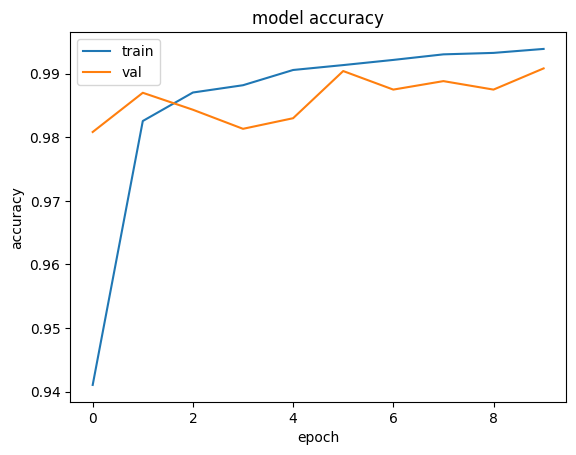

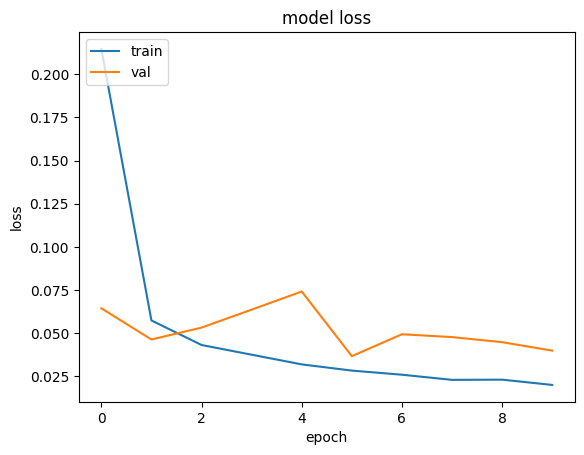

In [ ]:
plt.plot(mnist_5.history['accuracy'])
plt.plot(mnist_5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'test'], loc='upper left')
plt.show()

plt.plot(mnist_5.history['loss'])
plt.plot(mnist_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'test'], loc='upper left')
plt.show()

Com um tempo significantemente maior de treinamento, esta arquitetura teve pequenos ganhos de acurácia, mas um ganho relativamente significativo de diminuição de erro. Ainda observamos um perfil irregular na validação, porém neste caso mais comportado.

\begin{array}{|c|c|} \hline
Setup & test acc & test loss & trainingTime \\ \hline
1 & 0.9478 & 0.2561 & 50.002 \\ \hline
2 & 0.9778 & 0.1297 & 61.650 \\ \hline
3 & 0.9862 & 0.0705 & 83.641 \\ \hline
4 & 0.9822 & 0.0862 & 86.034 \\ \hline
5 & 0.9899 & 0.0407 & 146.842 \\ \hline
\end{array}

## Resultados MNIST

Tanto com o uso de uma rede neural simples e enxuta, quanto com redes convolucionais grandes, o MNIST é um dataset fácil de ser trabalhado, a devido a sua baixa complexidade espacial, pequeno número de classes e baixa similaridade interclasses.

\begin{array}{|c|c|} \hline
Setup & test acc & test loss & trainingTime \\ \hline
1 & 0.9478 & 0.2561 & 50.002 \\ \hline
2 & 0.9778 & 0.1297 & 61.650 \\ \hline
3 & 0.9862 & 0.0705 & 83.641 \\ \hline
4 & 0.9822 & 0.0862 & 86.034 \\ \hline
5 & 0.9899 & 0.0407 & 146.842 \\ \hline
\end{array}

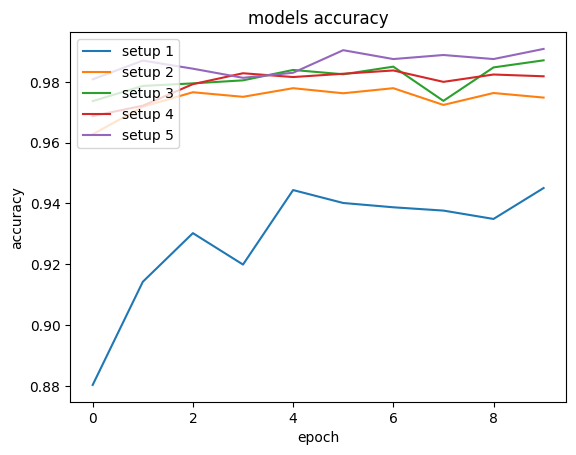

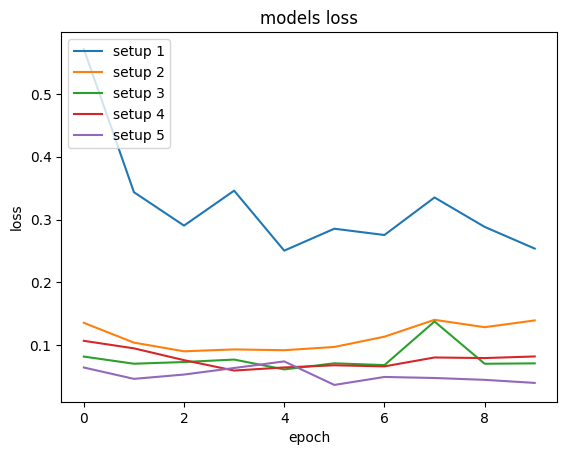

In [ ]:
plt.plot(mnist_1.history['val_accuracy'])
plt.plot(mnist_2.history['val_accuracy'])
plt.plot(mnist_3.history['val_accuracy'])
plt.plot(mnist_4.history['val_accuracy'])
plt.plot(mnist_5.history['val_accuracy'])
plt.title('models accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['setup 1', 'setup 2', 'setup 3', 'setup 4', 'setup 5'], loc='upper left')
plt.show()

plt.plot(mnist_1.history['val_loss'])
plt.plot(mnist_2.history['val_loss'])
plt.plot(mnist_3.history['val_loss'])
plt.plot(mnist_4.history['val_loss'])
plt.plot(mnist_5.history['val_loss'])
plt.title('models loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['setup 1', 'setup 2', 'setup 3', 'setup 4', 'setup 5'], loc='upper left')
plt.show()

In [ ]:
results = {
    "mnist": {"time": 146.842, "acc": 0.9899},
}

# Fashion MNIST

In [ ]:
# Carregar o conjunto de dados Fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist

#Carrega duas tuplas, representando os dados de treinamento e de teste.
#Cada tupla tem as imagens e os respectivos rótulos
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
num_classes = 10

4422102/4422102 [==============================] - 0s 0us/step


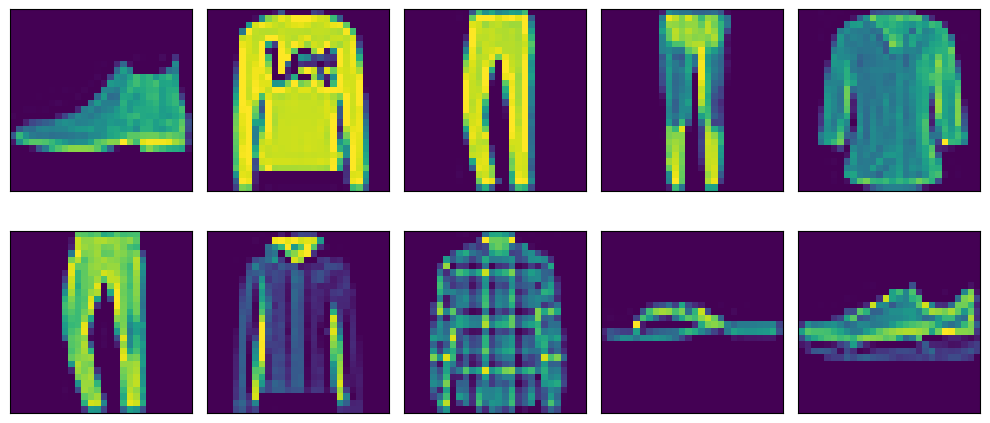

In [ ]:
# Mostre uma imagem de cada classe
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])  # Remova os rótulos do eixo x
    plt.yticks([])  # Remova os rótulos do eixo y
    plt.imshow(test_images[i])

plt.tight_layout()
plt.show()

In [ ]:
# Converter para codificação one-hot dos labels
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=num_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=num_classes)
#Não é necessário se utilizar como função de custo esparse_categorical_cross_entropy

### Configuração 1
Usando uma rede neural simples.
- Flatten 28x28
- Camada densamente conectada, 128 neurônios, ativação ReLU
- Camada densamente conectada, 10 neurônios, ativação softmax (saída)

In [ ]:
def get_fashion_mnist_network_1():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])

    # Compile o modelo
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    return model


In [ ]:
# Treine o modelo
model = get_fashion_mnist_network_1()
fmnist_1 = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

# Avalie o modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Acurácia no conjunto de teste: {test_accuracy * 100:.2f}%')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1500/1500 [==============================] - 7s 3ms/step - loss: 3.3849 - accuracy: 0.6552 - val_loss: 0.8297 - val_accuracy: 0.6964
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.7364 - accuracy: 0.7279 - val_loss: 0.6679 - val_accuracy:

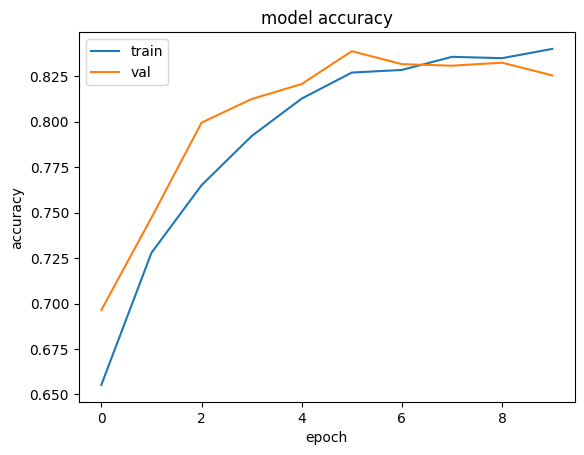

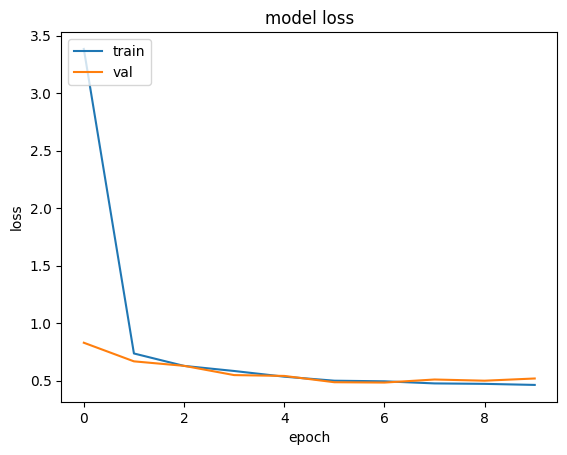

In [ ]:
plt.plot(fmnist_1.history['accuracy'])
plt.plot(fmnist_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'test'], loc='upper left')
plt.show()

plt.plot(fmnist_1.history['loss'])
plt.plot(fmnist_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'test'], loc='upper left')
plt.show()

\begin{array}{|c|c|} \hline
Setup & test acc & test loss & trainingTime \\ \hline
1 & 0.8151 & 0.5496 & 84.925 \\ \hline
\end{array}

### Configuração 2
Usando uma rede neural convolucional simples.
- Camada convolucional com 32 filtros 3x3, ativação ReLU
- Max Pooling 2x2, stride 1x1
- Camada flatten
- MLP densamente conectada com 50 neurônios, ativação ReLU
- MLP densamente conectada com 10 neurônios, ativação softmax (saída)

In [ ]:
def get_fmnist_network_2():
    model = keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    # Compile o modelo
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    return model

In [ ]:
# Treine o modelo
model = get_fmnist_network_2()
fmnist_2 = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

# Avalie o modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Acurácia no conjunto de teste: {test_accuracy * 100:.2f}%')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 50)                270450    
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
Total params: 271280 (1.03 MB)
Trainable params: 271280 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

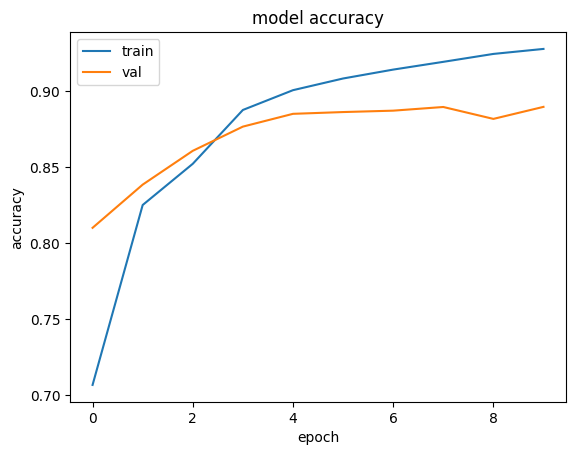

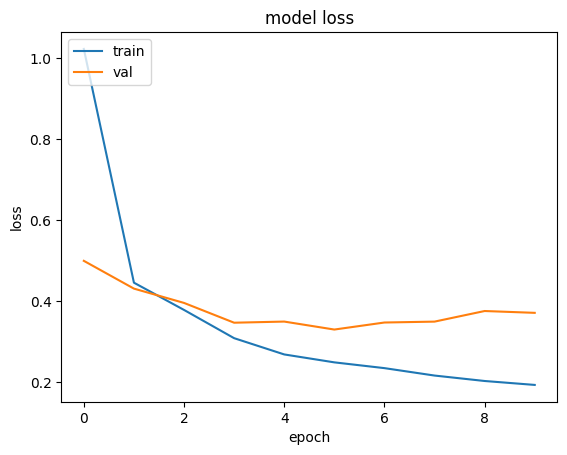

In [ ]:
plt.plot(fmnist_2.history['accuracy'])
plt.plot(fmnist_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'test'], loc='upper left')
plt.show()

plt.plot(fmnist_2.history['loss'])
plt.plot(fmnist_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'test'], loc='upper left')
plt.show()

\begin{array}{|c|c|} \hline
Setup & test acc & test loss & trainingTime \\ \hline
1 & 0.8151 & 0.5496 & 84.925 \\ \hline
2 & 0.8854 & 0.3871 & 84.201 \\ \hline
\end{array}

### Configuração 3
Aumentando a profundidade da rede neural convolucional.
- Camada convolucional com 32 filtros 3x3, ativação ReLU
- Max Pooling 2x2, stride 1x1
- Camada convolucional com 64 filtros 3x3, ativação ReLU
- Max Pooling 2x2, stride 1x1
- Camada flatten
- MLP densamente conectada com 50 neurônios, ativação ReLU
- MLP densamente conectada com 10 neurônios, ativação softmax (saída)

In [ ]:
def get_fmnist_network_3():
    model = keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    # Compile o modelo
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    return model

In [ ]:
# Treine o modelo
model = get_fmnist_network_3()
fmnist_3 = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

# Avalie o modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Acurácia no conjunto de teste: {test_accuracy * 100:.2f}%')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 50)               

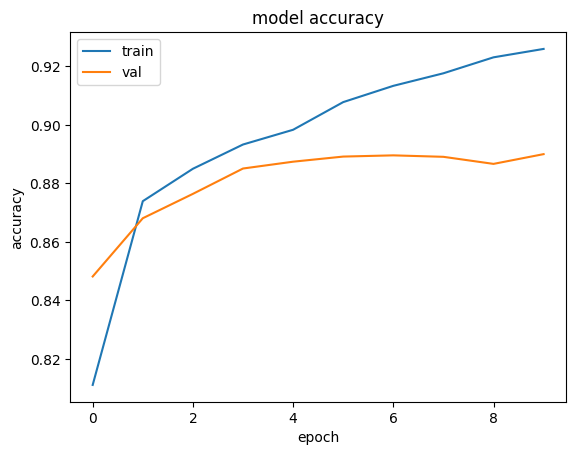

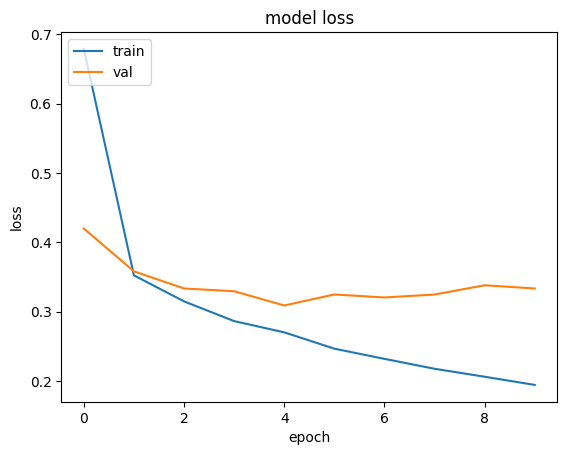

In [ ]:
plt.plot(fmnist_3.history['accuracy'])
plt.plot(fmnist_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'test'], loc='upper left')
plt.show()

plt.plot(fmnist_3.history['loss'])
plt.plot(fmnist_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'test'], loc='upper left')
plt.show()

\begin{array}{|c|c|} \hline
Setup & test acc & test loss & trainingTime \\ \hline
1 & 0.8151 & 0.5496 & 84.925 \\ \hline
2 & 0.8854 & 0.3871 & 84.201 \\ \hline
3 & 0.8882 & 0.3394 & 84.249 \\ \hline
\end{array}

### Configuração 4
Aumentando um pouco mais a profundidade da rede, tentando se aproximar de um overfitting.
- Camada convolucional com 32 filtros 3x3, ativação ReLU
- Max Pooling 2x2, stride 1x1
- Camada convolucional com 64 filtros 3x3, ativação ReLU
- Max Pooling 2x2, stride 1x1
- Camada convolucional com 128 filtros 3x3, ativação ReLU
- Max Pooling 2x2, stride 1x1
- Camada flatten
- MLP densamente conectada com 50 neurônios, ativação ReLU
- MLP densamente conectada com 10 neurônios, ativação softmax (saída)

In [ ]:
def get_fmnist_network_4():
    model = keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    # Compile o modelo
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    return model

In [ ]:
# Treine o modelo
model = get_fmnist_network_4()
fmnist_4 = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

# Avalie o modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Acurácia no conjunto de teste: {test_accuracy * 100:.2f}%')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 1, 1, 128)        

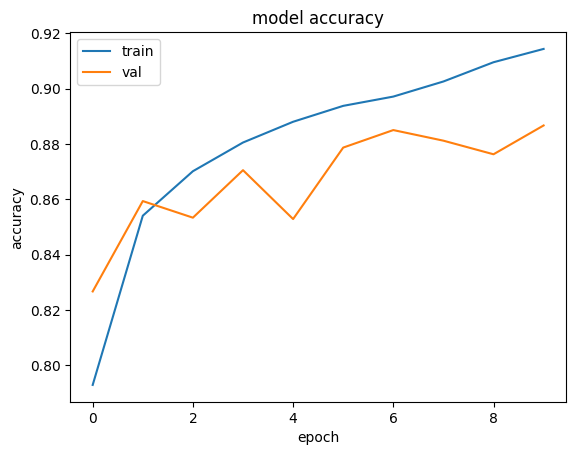

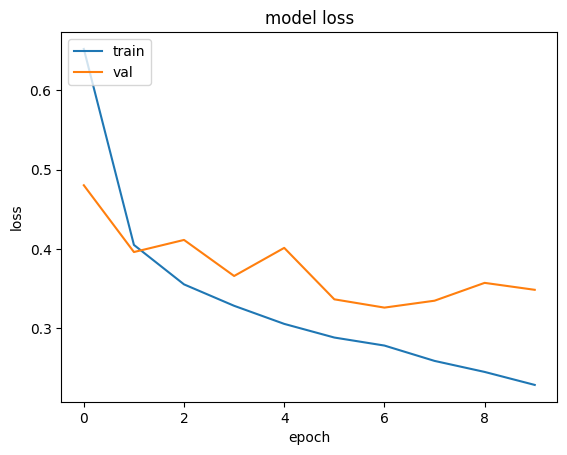

In [ ]:
plt.plot(fmnist_4.history['accuracy'])
plt.plot(fmnist_4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'test'], loc='upper left')
plt.show()

plt.plot(fmnist_4.history['loss'])
plt.plot(fmnist_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'test'], loc='upper left')
plt.show()

Esta configuração apresentou uma diminuição da acurácia e aumento do erro em relação a sua execução no MNIST.

O Fashion MNIST é um dataset mais desafiador que o MNIST, pois contém imagens com maior complexidade espacial, exigindo um modelo que extraia mais features para diferenciar melhor as classes.

\begin{array}{|c|c|} \hline
Setup & test acc & test loss & trainingTime \\ \hline
1 & 0.8151 & 0.5496 & 84.925 \\ \hline
2 & 0.8854 & 0.3871 & 84.201 \\ \hline
3 & 0.8882 & 0.3394 & 84.249 \\ \hline
4 & 0.8787 & 0.3857 & 85.038 \\ \hline
\end{array}

### Configuração 5
Aumentando um pouco mais a complexidade do modelo, tentando se aproximar de um overfitting.
- 2x Camada convolucional com 32 filtros 3x3, ativação ReLU
- Max Pooling 2x2, stride 1x1
- 2x Camada convolucional com 64 filtros 3x3, ativação ReLU
- Max Pooling 2x2, stride 1x1
- Camada convolucional com 128 filtros 3x3, ativação ReLU
- Max Pooling 2x2, stride 1x1
- Camada flatten
- MLP densamente conectada com 50 neurônios, ativação ReLU
- MLP densamente conectada com 10 neurônios, ativação softmax (saída)

In [ ]:
def get_fmnist_network_5():
    model = keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    # Compile o modelo
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    return model

In [ ]:
# Treine o modelo
model = get_fmnist_network_5()
fmnist_5 = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

# Avalie o modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Acurácia no conjunto de teste: {test_accuracy * 100:.2f}%')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                 

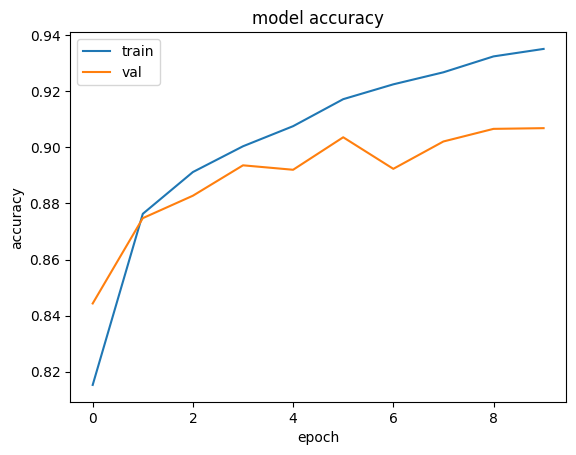

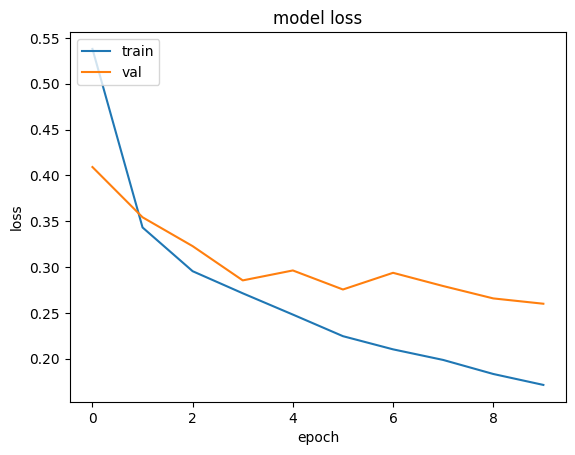

In [ ]:
plt.plot(fmnist_5.history['accuracy'])
plt.plot(fmnist_5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'test'], loc='upper left')
plt.show()

plt.plot(fmnist_5.history['loss'])
plt.plot(fmnist_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'test'], loc='upper left')
plt.show()

\begin{array}{|c|c|} \hline
Setup & test acc & test loss & trainingTime \\ \hline
1 & 0.8151 & 0.5496 & 84.925 \\ \hline
2 & 0.8854 & 0.3871 & 84.201 \\ \hline
3 & 0.8882 & 0.3394 & 84.249 \\ \hline
4 & 0.8787 & 0.3857 & 85.038 \\ \hline
5 & 0.9003 & 0.2858 & 145.299 \\ \hline
\end{array}

### Resultados Fashion MNIST

O Fashion MNIST é um dataset mais desafiador que o MNIST, pois contém imagens com maior complexidade espacial, exigindo um modelo que extraia mais features para diferenciar melhor as classes.

- MNIST
\begin{array}{|c|c|} \hline
Setup & test acc & test loss & trainingTime \\ \hline
1 & 0.9478 & 0.2561 & 50.002 \\ \hline
2 & 0.9778 & 0.1297 & 61.650 \\ \hline
3 & 0.9862 & 0.0705 & 83.641 \\ \hline
4 & 0.9822 & 0.0862 & 86.034 \\ \hline
5 & 0.9899 & 0.0407 & 146.842 \\ \hline
\end{array}

- Fashion MNIST
\begin{array}{|c|c|} \hline
Setup & test acc & test loss & trainingTime \\ \hline
1 & 0.8151 & 0.5496 & 84.925 \\ \hline
2 & 0.8854 & 0.3871 & 84.201 \\ \hline
3 & 0.8882 & 0.3394 & 84.249 \\ \hline
4 & 0.8787 & 0.3857 & 85.038 \\ \hline
5 & 0.9003 & 0.2858 & 145.299 \\ \hline
\end{array}

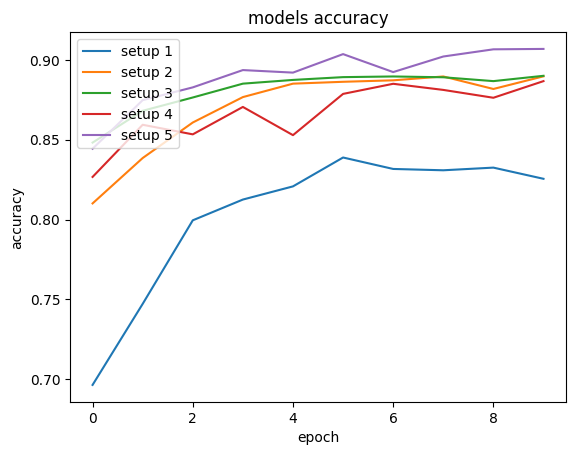

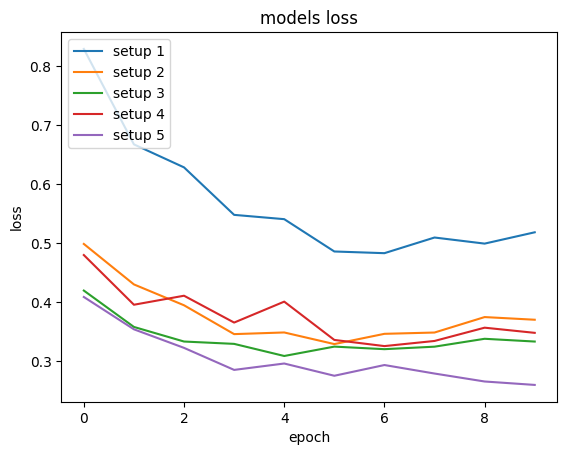

In [ ]:
plt.plot(fmnist_1.history['val_accuracy'])
plt.plot(fmnist_2.history['val_accuracy'])
plt.plot(fmnist_3.history['val_accuracy'])
plt.plot(fmnist_4.history['val_accuracy'])
plt.plot(fmnist_5.history['val_accuracy'])
plt.title('models accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['setup 1', 'setup 2', 'setup 3', 'setup 4', 'setup 5'], loc='upper left')
plt.show()

plt.plot(fmnist_1.history['val_loss'])
plt.plot(fmnist_2.history['val_loss'])
plt.plot(fmnist_3.history['val_loss'])
plt.plot(fmnist_4.history['val_loss'])
plt.plot(fmnist_5.history['val_loss'])
plt.title('models loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['setup 1', 'setup 2', 'setup 3', 'setup 4', 'setup 5'], loc='upper left')
plt.show()

In [ ]:
results = {
    "fashion_mnist": {"time": 145.299, "acc": 0.9003},
}

# Resultados

In [ ]:
def get_fashion_mnist_network():
    model = keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    # Compile o modelo
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    return model

def get_mnist_network():
    model = keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    # Compile o modelo
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    return model

def get_cifar100_network():
    model = keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='valid'),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='valid'),
        tf.keras.layers.MaxPooling2D((2, 2), padding='valid'),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')  # 100 classes de saída
    ])

    opt = keras.optimizers.Adam(learning_rate=0.0001)

    # Compile o modelo
    model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    return model

def get_cifar10_network():
    model = keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2), padding='same'),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2), padding='same'),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2), ),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(120, activation='relu'),
        tf.keras.layers.Dense(84, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')  # 10 classes de saída
    ])

    # Compile o modelo
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    return model

Preencha o dict abaixo substituindo os None com a acuracia final (acc) e o tempo de treinamento (time) encontrado no seu experimento pra cada dataset

Tarefa
Escreva código para executar redes neurais nos seguintes datasets:

MNIST (pode aproveitar o codigo existente)
Fashion MNIST
CIFAR-10
CIFAR-100
Cada execução deve ser por 10 épocas.

Você deve preencher as funções a seguir para retornarem a rede neural com a melhor configuração que você conseguiu para cada dataset (a do MNIST deve ser feita na get_mnist_network() acima). O notebook deve ser entregue com a rede neural que obteve a melhor performance em cada conjunto de dados.

IMPORTANTE: as funções não devem TREINAR nem AVALIAR as redes neurais, apenas instancia-las e retorna-las.

Ao final, preencha o dict results com o desempenho encontrado em cada execução.

In [ ]:
results = {
    "mnist": {"time": 146.842, "acc": 0.9899},
    "fashion_mnist": {"time": 145.299, "acc": 0.9003},
    "cifar10": {"time": 145.902, "acc": 0.7187},
    "cifar100": {"time": 85.638, "acc": 0.3329},
}

---
Leonardo Azzi Martins

Instituto de Informática

Universidade Federal do Rio Grande do Sul